In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
df_train = pd.read_csv('./Data/train.csv')

df_train.columns

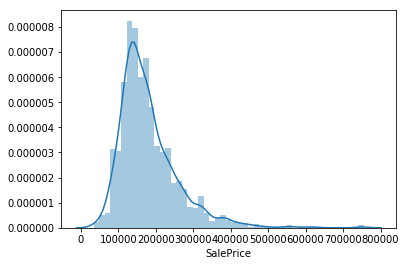

In [7]:
sns.distplot(df_train['SalePrice'])

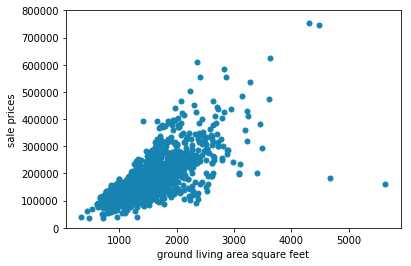

In [18]:
# scatter plot of sale prices based on ground living area square feet
plt.scatter(x = df_train['GrLivArea'], y = df_train['SalePrice'],s = 25, c = ['#1783B1'])
plt.ylim(0, 800000)
plt.xlabel('ground living area square feet')
plt.ylabel('sale prices')

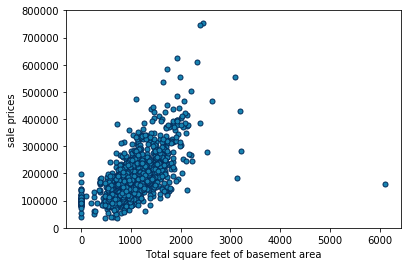

In [22]:
# scatter plot of sale prices based on Total square feet of basement area
plt.scatter(x = df_train['TotalBsmtSF'], y = df_train['SalePrice'],s = 25, c = ['#1783B1'], edgecolors = ['#042D5B'])
plt.ylim(0, 800000)
plt.xlabel('Total square feet of basement area')
plt.ylabel('sale prices')

(-0.5, 9.5, 0, 800000)

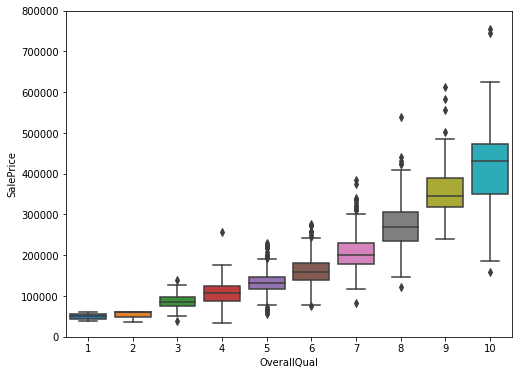

In [31]:
# box plot of sale prices based on overall qual
variable = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[variable]], axis = 1)
f, ax = plt.subplots(figsize = (8, 6))
fig = sns.boxplot(x = variable, y = 'SalePrice', data = data)
fig.axis(ymin = 0, ymax = 800000)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 <a list of 112 Text xticklabel objects>)

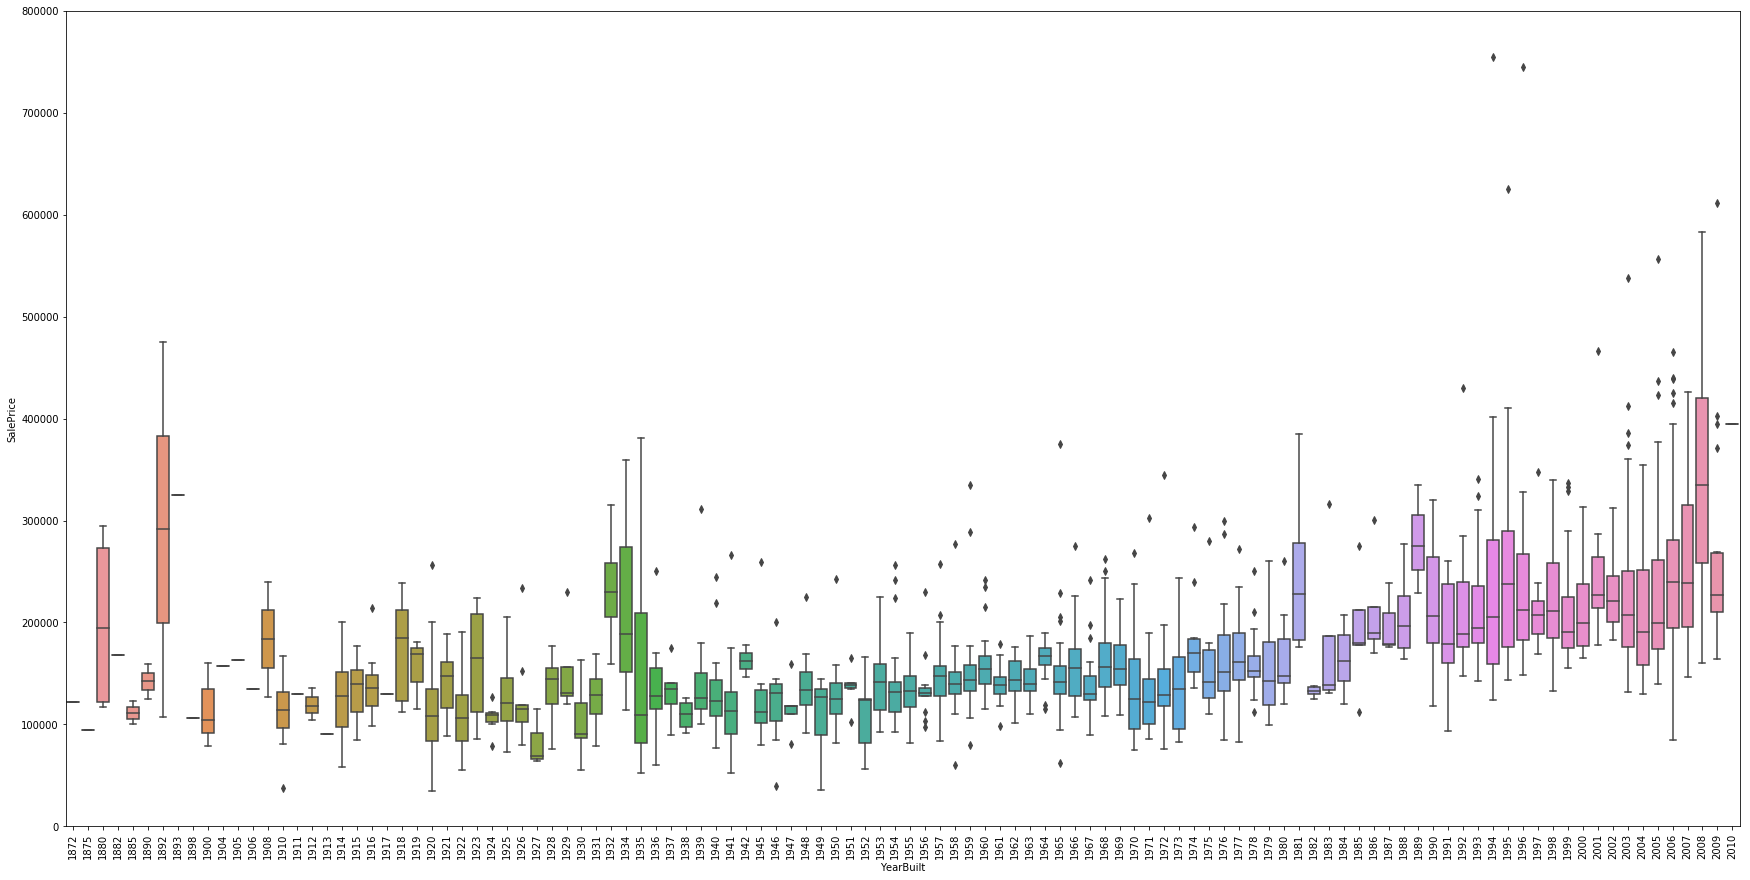

In [35]:
# box plot of sale prices based on year of build
variable = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[variable]], axis = 1)
fig, ax = plt.subplots(figsize = (30, 15))
fig = sns.boxplot(x = variable, y = 'SalePrice', data = data)
fig.axis(ymin = 0, ymax = 800000)
plt.xticks(rotation = 90)

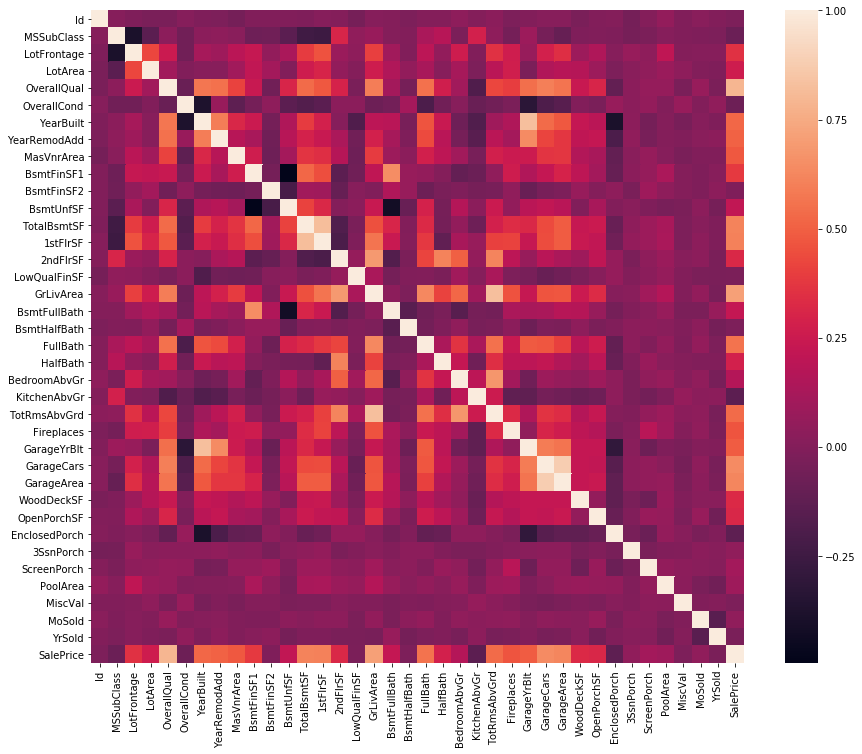

In [38]:
corrmat = df_train.corr()
fig, axis = plt.subplots(figsize = (15, 12))
sns.heatmap(corrmat, square = True)

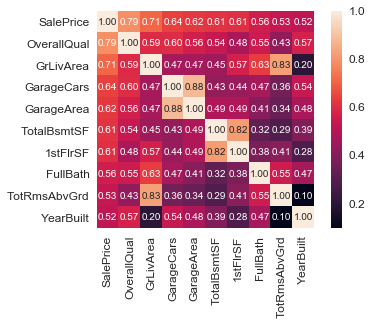

In [50]:
columns = corrmat.nlargest(10, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[columns].values.T)
sns.set(font_scale = 1.2)
hm = sns.heatmap(cm, cbar = True, annot = True, square = True, fmt = '.2f', annot_kws = {'size': 10},
                 yticklabels = columns.values, xticklabels = columns.values)
plt.show()

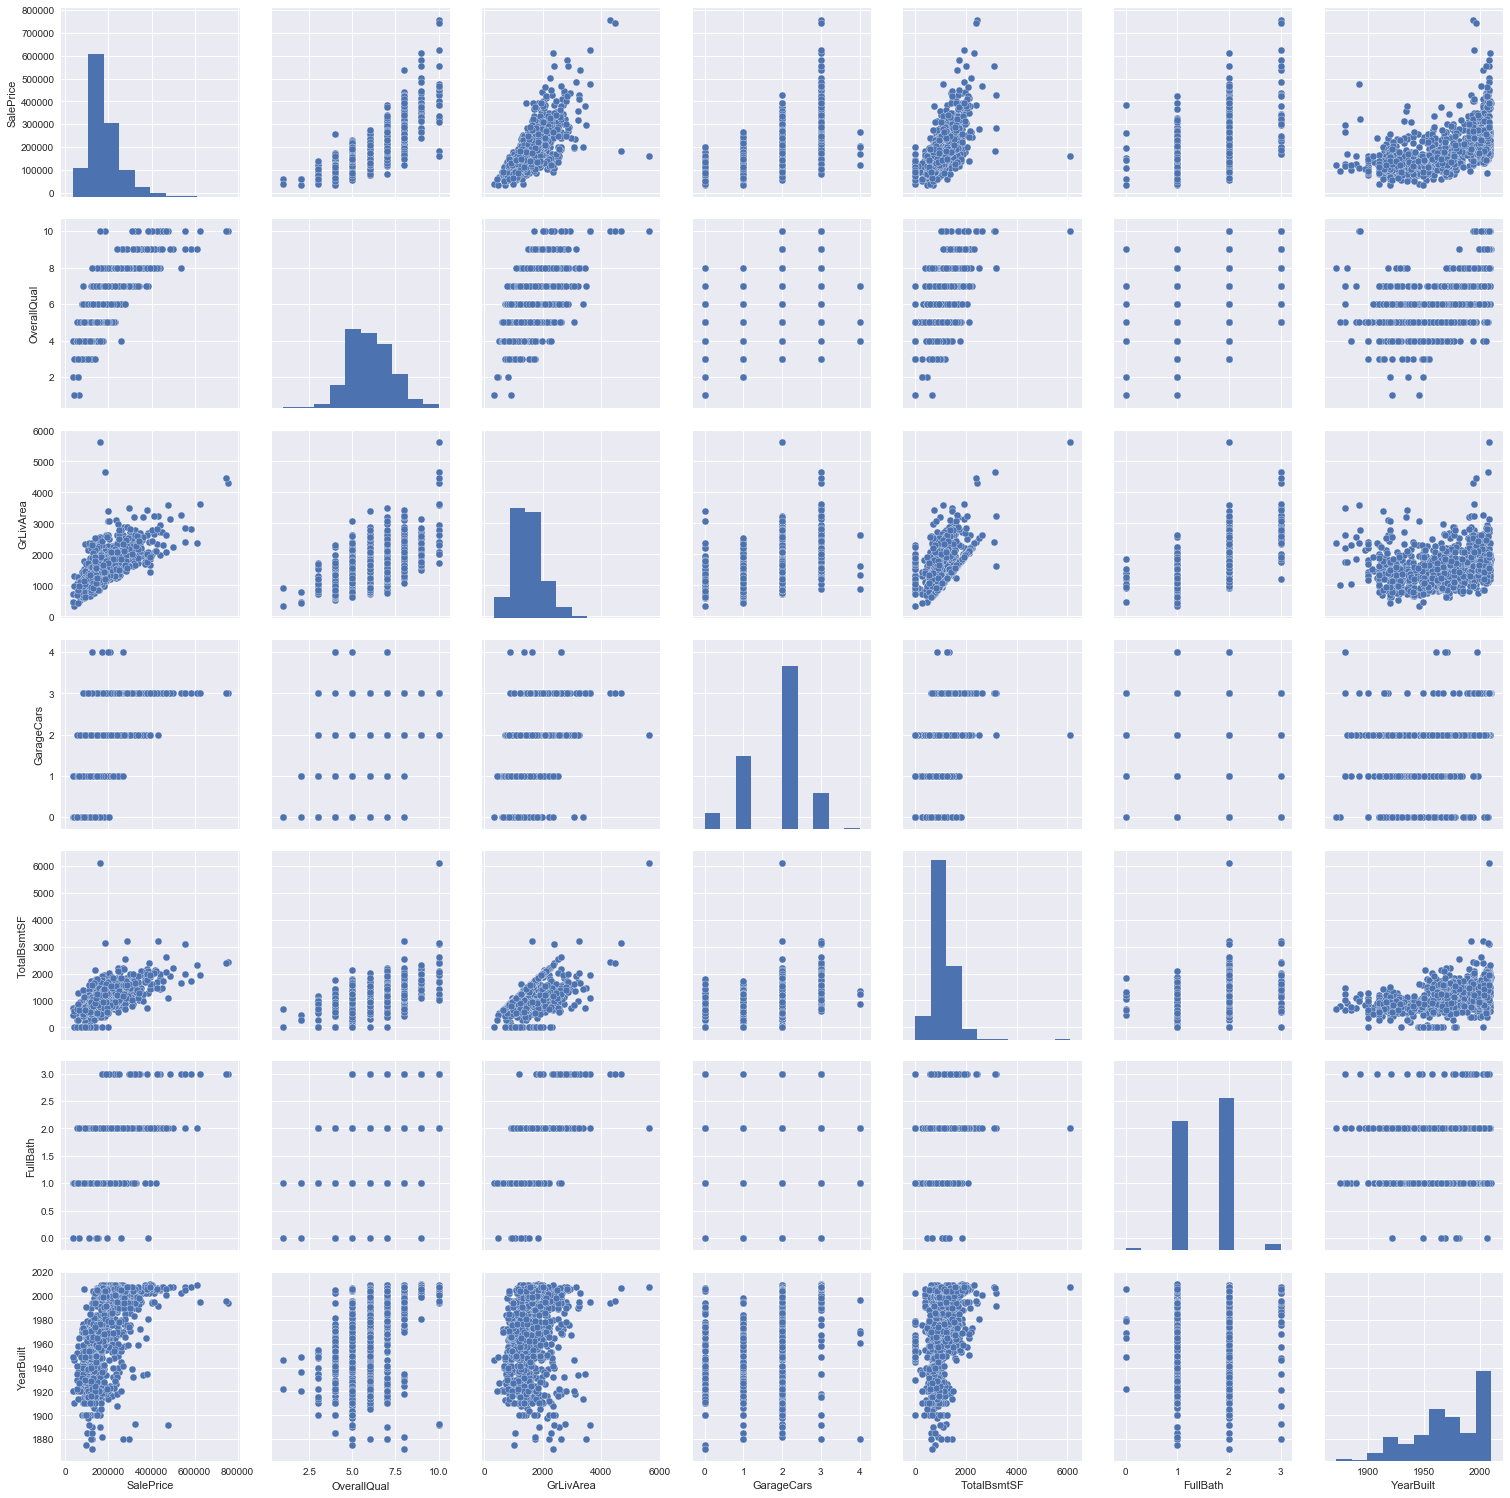

In [55]:
sns.set()
columns = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[columns], size = 3)
plt.show()